In [1]:
import pandas as pd

In [2]:
import requests

In [3]:
from requests.auth import HTTPBasicAuth
auth = HTTPBasicAuth('elastic', 'AWbtmGda2Q7BI2bYpdjyF4qd')
url = 'https://8f9677360fc34e2eb943d737b2597c7b.us-east-1.aws.found.io:9243/brasov-dev/_search?size=10000&q=*&sort=TimeStamp:desc'


In [4]:
response = requests.get(url=url, auth=auth)

In [5]:
response

<Response [200]>

In [6]:
import json
data = json.loads(response.text)

In [7]:
data

{'took': 548,
 'timed_out': False,
 '_shards': {'total': 1, 'successful': 1, 'skipped': 0, 'failed': 0},
 'hits': {'total': {'value': 10000, 'relation': 'gte'},
  'max_score': None,
  'hits': [{'_index': 'brasov-dev',
    '_type': '_doc',
    '_id': 'vEGEwH8Bwa_bL2zRyg3r',
    '_score': None,
    '_source': {'Source': 'UradMonitor',
     'Sensor': 'pm1',
     'Value': 13,
     'LocationLat': 45.589267,
     'LocationLong': 25.46445,
     'TimeStamp': 1648202399000,
     'Measurement': 'µg/m3'},
    'sort': [1648202399000]},
   {'_index': 'brasov-dev',
    '_type': '_doc',
    '_id': 'vUGEwH8Bwa_bL2zRyg31',
    '_score': None,
    '_source': {'Source': 'UradMonitor',
     'Sensor': 'pm10',
     'Value': 24,
     'LocationLat': 45.589267,
     'LocationLong': 25.46445,
     'TimeStamp': 1648202399000,
     'Measurement': 'µg/m3'},
    'sort': [1648202399000]},
   {'_index': 'brasov-dev',
    '_type': '_doc',
    '_id': 'y0GEwH8Bwa_bL2zRyw0r',
    '_score': None,
    '_source': {'Source':

In [8]:
data.keys()

dict_keys(['took', 'timed_out', '_shards', 'hits'])

In [9]:
data['hits']

{'total': {'value': 10000, 'relation': 'gte'},
 'max_score': None,
 'hits': [{'_index': 'brasov-dev',
   '_type': '_doc',
   '_id': 'vEGEwH8Bwa_bL2zRyg3r',
   '_score': None,
   '_source': {'Source': 'UradMonitor',
    'Sensor': 'pm1',
    'Value': 13,
    'LocationLat': 45.589267,
    'LocationLong': 25.46445,
    'TimeStamp': 1648202399000,
    'Measurement': 'µg/m3'},
   'sort': [1648202399000]},
  {'_index': 'brasov-dev',
   '_type': '_doc',
   '_id': 'vUGEwH8Bwa_bL2zRyg31',
   '_score': None,
   '_source': {'Source': 'UradMonitor',
    'Sensor': 'pm10',
    'Value': 24,
    'LocationLat': 45.589267,
    'LocationLong': 25.46445,
    'TimeStamp': 1648202399000,
    'Measurement': 'µg/m3'},
   'sort': [1648202399000]},
  {'_index': 'brasov-dev',
   '_type': '_doc',
   '_id': 'y0GEwH8Bwa_bL2zRyw0r',
   '_score': None,
   '_source': {'Source': 'UradMonitor',
    'Sensor': 'pm25',
    'Value': 20,
    'LocationLat': 45.589267,
    'LocationLong': 25.46445,
    'TimeStamp': 164820239900

In [10]:
from pandas import json_normalize
df2 = json_normalize(data['hits']['hits'])

In [11]:
df2

,_index,_type,_id,_score,sort,_source.Source,_source.Sensor,_source.Value,_source.LocationLat,_source.LocationLong,_source.TimeStamp,_source.Measurement
0,brasov-dev,_doc,vEGEwH8Bwa_bL2zRyg3r,None,[1648202399000],UradMonitor,pm1,13.0,45.589267,25.464450,1648202399000,µg/m3
1,brasov-dev,_doc,vUGEwH8Bwa_bL2zRyg31,None,[1648202399000],UradMonitor,pm10,24.0,45.589267,25.464450,1648202399000,µg/m3
2,brasov-dev,_doc,y0GEwH8Bwa_bL2zRyw0r,None,[1648202399000],UradMonitor,pm25,20.0,45.589267,25.464450,1648202399000,µg/m3
3,brasov-dev,_doc,XUGEwH8Bwa_bL2zRxg3m,None,[1648202397000],UradMonitor,pm10,23.0,45.704032,25.640955,1648202397000,µg/m3
4,brasov-dev,_doc,p0GEwH8Bwa_bL2zRyg1k,None,[1648202397000],UradMonitor,pm1,8.0,45.704032,25.640955,1648202397000,µg/m3
...,...,...,...,...,...,...,...,...,...,...,...,...
9995,brasov-dev,_doc,JEChqn8Bwa_bL2zRw8ZH,None,[1647835157000],UradMonitor,pm25,50.0,45.673977,25.606484,1647835157000,µg/m3
9996,brasov-dev,_doc,70Chqn8Bwa_bL2zRwMWI,None,[1647835156000],UradMonitor,pm25,60.0,45.676195,25.645632,1647835156000,µg/m3
9997,brasov-dev,_doc,8UChqn8Bwa_bL2zRwMWJ,None,[1647835156000],UradMonitor,co2,657.0,45.676195,25.645632,1647835156000,µg/m3
9998,brasov-dev,_doc,8kChqn8Bwa_bL2zRwMWK,None,[1647835156000],UradMonitor,pm10,68.0,45.676195,25.645632,1647835156000,µg/m3


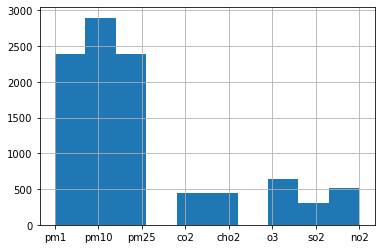

In [12]:
hist = df2.get('_source.Sensor').hist()

In [13]:
co2 = df2[df2.get('_source.Sensor') == 'co2']
co2.head(10)


,_index,_type,_id,_score,sort,_source.Source,_source.Sensor,_source.Value,_source.LocationLat,_source.LocationLong,_source.TimeStamp,_source.Measurement
17,brasov-dev,_doc,zkGEwH8Bwa_bL2zRyw06,None,[1648202381000],UradMonitor,co2,549.0,45.657148,25.563752,1648202381000,µg/m3
46,brasov-dev,_doc,rEGEwH8Bwa_bL2zRyg17,None,[1648202352000],UradMonitor,co2,515.0,45.651464,25.615426,1648202352000,µg/m3
52,brasov-dev,_doc,r0GEwH8Bwa_bL2zRyg2P,None,[1648202351000],UradMonitor,co2,418.0,45.673977,25.606484,1648202351000,µg/m3
67,brasov-dev,_doc,tkGEwH8Bwa_bL2zRyg23,None,[1648202341000],UradMonitor,co2,600.0,45.676195,25.645632,1648202341000,µg/m3
114,brasov-dev,_doc,NUFNwH8Bwa_bL2zR2Q2o,None,[1648198781000],UradMonitor,co2,556.0,45.657148,25.563752,1648198781000,µg/m3
145,brasov-dev,_doc,LUFNwH8Bwa_bL2zR2Q2Z,None,[1648198752000],UradMonitor,co2,529.0,45.651464,25.615426,1648198752000,µg/m3
149,brasov-dev,_doc,F0FNwH8Bwa_bL2zR2Q1X,None,[1648198751000],UradMonitor,co2,433.0,45.673977,25.606484,1648198751000,µg/m3
161,brasov-dev,_doc,L0FNwH8Bwa_bL2zR2Q2d,None,[1648198741000],UradMonitor,co2,624.0,45.676195,25.645632,1648198741000,µg/m3
206,brasov-dev,_doc,W0EWwH8Bwa_bL2zR7QxD,None,[1648195181000],UradMonitor,co2,567.0,45.657148,25.563752,1648195181000,µg/m3
236,brasov-dev,_doc,hkEWwH8Bwa_bL2zR8wz9,None,[1648195152000],UradMonitor,co2,541.0,45.651464,25.615426,1648195152000,µg/m3


In [14]:
print('Lungime dataframe: ',len(df2))
print('Lungime dataframe pm 1: ',len(co2))

Lungime dataframe:  10000
Lungime dataframe pm 1:  439


In [15]:
print(f"Number of no data values per column:\n{co2.isna().sum()}")

Number of no data values per column:
_index                    0
_type                     0
_id                       0
_score                  439
sort                      0
_source.Source            0
_source.Sensor            0
_source.Value             0
_source.LocationLat       0
_source.LocationLong      0
_source.TimeStamp         0
_source.Measurement       0
dtype: int64


In [16]:
# co2_v2 = co2.drop('_score', inplace=True, axis=1) #method 1
# co2_v2 = co2.drop('_score', axis=1) #method 2
# co2_v2 = co2.loc[:, co2.columns != '_score'] #method3
co2_v2 = co2[[i for i in list(co2.columns) if i != '_score']] #method4
co2_v2.head(7)

,_index,_type,_id,sort,_source.Source,_source.Sensor,_source.Value,_source.LocationLat,_source.LocationLong,_source.TimeStamp,_source.Measurement
17,brasov-dev,_doc,zkGEwH8Bwa_bL2zRyw06,[1648202381000],UradMonitor,co2,549.0,45.657148,25.563752,1648202381000,µg/m3
46,brasov-dev,_doc,rEGEwH8Bwa_bL2zRyg17,[1648202352000],UradMonitor,co2,515.0,45.651464,25.615426,1648202352000,µg/m3
52,brasov-dev,_doc,r0GEwH8Bwa_bL2zRyg2P,[1648202351000],UradMonitor,co2,418.0,45.673977,25.606484,1648202351000,µg/m3
67,brasov-dev,_doc,tkGEwH8Bwa_bL2zRyg23,[1648202341000],UradMonitor,co2,600.0,45.676195,25.645632,1648202341000,µg/m3
114,brasov-dev,_doc,NUFNwH8Bwa_bL2zR2Q2o,[1648198781000],UradMonitor,co2,556.0,45.657148,25.563752,1648198781000,µg/m3
145,brasov-dev,_doc,LUFNwH8Bwa_bL2zR2Q2Z,[1648198752000],UradMonitor,co2,529.0,45.651464,25.615426,1648198752000,µg/m3
149,brasov-dev,_doc,F0FNwH8Bwa_bL2zR2Q1X,[1648198751000],UradMonitor,co2,433.0,45.673977,25.606484,1648198751000,µg/m3


In [17]:
print('Lungime dataframe: ', len(df2))
print('Lungime dataframe pm 1: ', len(co2))
print('Lungime dataframe pm 1 - fara _score: ', len(co2_v2))

Lungime dataframe:  10000
Lungime dataframe pm 1:  439
Lungime dataframe pm 1 - fara _score:  439


In [18]:
print(f"Number of no data values per column:\n{co2_v2.isna().sum()}")

Number of no data values per column:
_index                  0
_type                   0
_id                     0
sort                    0
_source.Source          0
_source.Sensor          0
_source.Value           0
_source.LocationLat     0
_source.LocationLong    0
_source.TimeStamp       0
_source.Measurement     0
dtype: int64


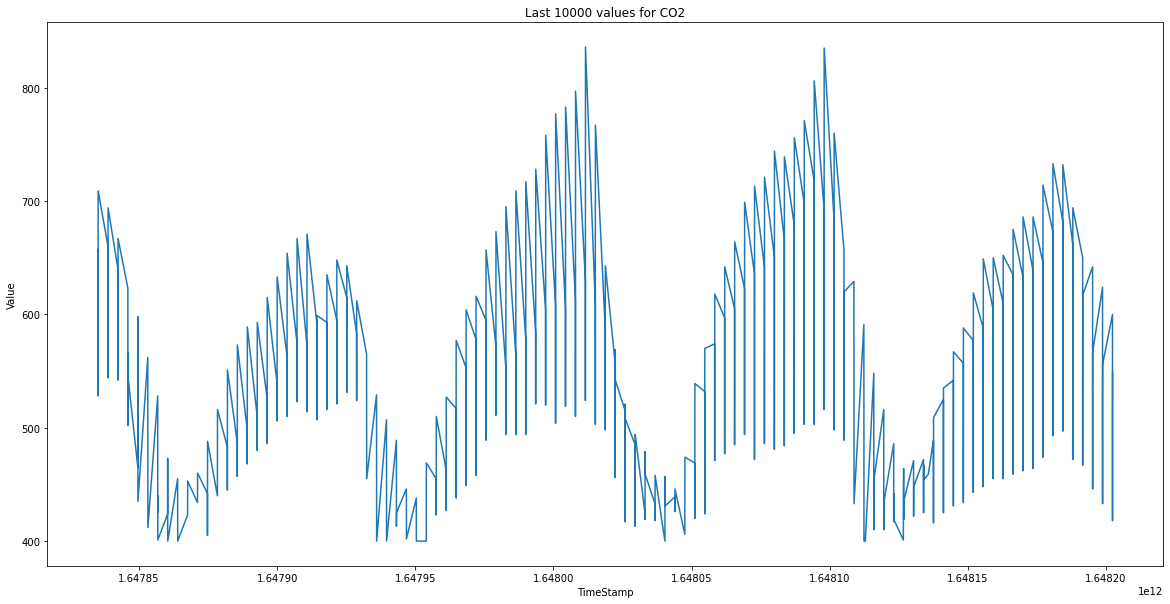

In [19]:
import matplotlib.pyplot as plt
plt.close("all")
# fig = plt.figure(figsize=(20,10), frameon=True)
plt.figure(figsize=(20,10))
plt.plot(co2_v2.get('_source.TimeStamp'), co2_v2.get('_source.Value'))
plt.xlabel("TimeStamp")
plt.ylabel("Value")
plt.title("Last 10000 values for CO2")
plt.savefig('plots/CO2.jpg', dpi = 100, bbox_inches = 'tight')
# fig.savefig('plots/CO2.jpg', dpi = 100, bbox_inches = 'tight')
plt.show()

In [20]:
co2_v2.groupby(['_source.LocationLat','_source.LocationLong']).size().reset_index().rename(columns={0:'count'})

,_source.LocationLat,_source.LocationLong,count
0,45.642198,25.588532,27
1,45.651464,25.615426,103
2,45.657148,25.563752,103
3,45.673977,25.606484,103
4,45.676195,25.645632,103
